In [109]:
import pandas as pd
import numpy as np
import regex as re

In [110]:
dataset = pd.read_csv('data/data_clean_removed.csv')
dataset.drop(["Unnamed: 0"],inplace= True,axis = 1)

In [111]:
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [112]:
dataset.head(5)

,Price,Space,Rooms,Market,Year,elevator,Parkingplace,balkon,taras,ogrdek,district,street,level,max_level
0,4000000.0,560.00,4,wtórny,2015,1,1,1,1,1,Wawer,Patriotów,3,3
1,4000000.0,560.00,4,wtórny,2015,1,1,1,1,1,Wawer,Patriotów,3,3
2,21350100.0,487.75,10,wtórny,2021,1,1,0,0,0,Śródmieście,Elektryczna,6,6
3,19900000.0,487.00,6,wtórny,2001,1,1,0,0,0,Mokotów,Cybulskiego,5,5
4,795900.0,445.00,2,pierwotny,2022,1,1,0,0,0,Praga-Południe,Gocław,4,8


In [113]:
dataset_dummies = pd.get_dummies(dataset,columns=['Market','street','district'])

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [115]:
algorithms = [['gradient_boost_reg',GradientBoostingRegressor()],['ElasticNet',ElasticNet()],['SGDREG',SGDRegressor()],["SVR",SVR()],["BsyRidge",BayesianRidge()],["KerRidge",KernelRidge()],["LR",LinearRegression()],
                ["XGBReg",XGBRegressor()],["CatBoostReg",CatBoostRegressor()]]

In [116]:
score = []
name_list = [] 

def train_predict_save_metrics(algorithms_list,dataset):
    x = dataset.iloc[:,1:]
    y =  dataset.iloc[:,-1]
    kfold = KFold(n_splits=10,shuffle=True, random_state=42)
    for name, alg in algorithms_list:
        cv_results = cross_val_score(alg, x, y, cv=kfold, scoring='neg_root_mean_squared_error')
        score.append(cv_results)
        name_list.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [136]:
train_predict_save_metrics(algorithms,dataset_dummies)

gradient_boost_reg: -0.005628 (0.012653)


C:\Users\Krzysztof\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet: -0.004275 (0.012263)
SGDREG: -1116031381600616.375000 (839024626768219.750000)
SVR: -0.094072 (0.017669)
BsyRidge: -0.006371 (0.013127)
KerRidge: -0.005830 (0.012441)
LR: -0.006374 (0.013130)
XGBReg: -0.008208 (0.016416)
Learning rate set to 0.053345
0:	learn: 0.0135044	total: 17.4ms	remaining: 17.4s
1:	learn: 0.0133243	total: 27.5ms	remaining: 13.7s
2:	learn: 0.0131465	total: 36.5ms	remaining: 12.1s
3:	learn: 0.0129711	total: 45.9ms	remaining: 11.4s
4:	learn: 0.0127980	total: 55.1ms	remaining: 11s
5:	learn: 0.0126273	total: 65.7ms	remaining: 10.9s
6:	learn: 0.0124588	total: 75.4ms	remaining: 10.7s
7:	learn: 0.0122926	total: 84.6ms	remaining: 10.5s
8:	learn: 0.0121286	total: 94ms	remaining: 10.3s
9:	learn: 0.0119668	total: 104ms	remaining: 10.3s
10:	learn: 0.0118072	total: 114ms	remaining: 10.2s
11:	learn: 0.0116497	total: 123ms	remaining: 10.1s
12:	learn: 0.0114943	total: 133ms	remaining: 10.1s
13:	learn: 0.0113723	total: 143ms	remaining: 10.1s
14:	learn: 0.0112207	total: 

C:\Users\Krzysztof\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Krzysztof\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Krzysztof\AppData\Roaming\Python\Python39\site-packages\catboost\core.py", line 5590, in fit
    return self._fit(X, y, cat_features, None, None, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\Krzysztof\AppData\Roaming\Python\

In [137]:
import matplotlib.pyplot as plt

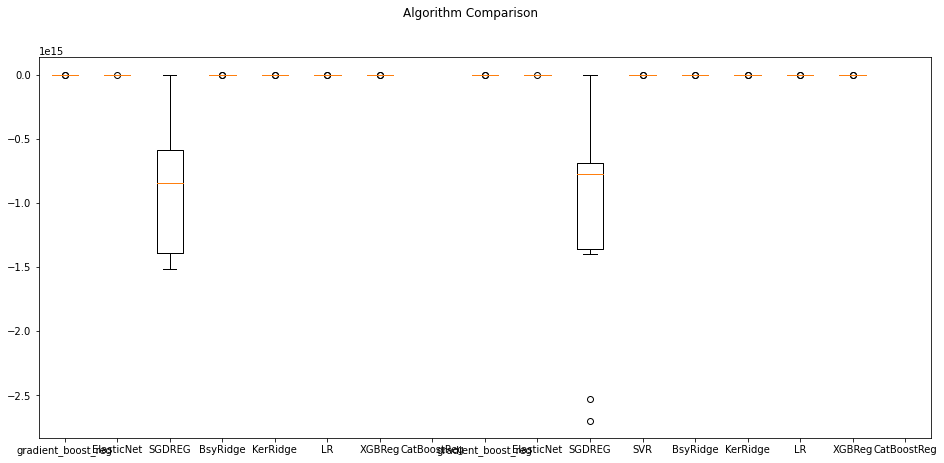

In [138]:
fig = plt.figure(figsize = [16,7])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(score)
ax.set_xticklabels(name_list)
plt.show()

In [153]:
dict = {}
for x,y in zip(name_list,score):
    print(x,y)

gradient_boost_reg [-4.10650781e-02 -4.97684071e-09 -4.97684071e-09 -4.97684071e-09
 -4.97684071e-09 -4.97684071e-09 -4.97684071e-09 -4.97684071e-09
 -4.97684071e-09 -1.68768926e-02]
ElasticNet [-0.04106508 -0.00018737 -0.00018737 -0.00018737 -0.00018737 -0.00018737
 -0.00018737 -0.00018737 -0.00018737 -0.00018737]
BsyRidge [-4.10650781e-02 -9.69737280e-04 -7.70033480e-05 -8.11376381e-05
 -7.60844231e-05 -8.99646380e-05 -8.10733387e-05 -1.51074343e-04
 -1.00080562e-04 -2.10164474e-02]
KerRidge [-0.04106508 -0.00079483 -0.00029546 -0.00028754 -0.00037591 -0.00034255
 -0.00032906 -0.00035776 -0.00031336 -0.01414135]
LR [-4.10650781e-02 -9.70089338e-04 -7.70172072e-05 -8.11744098e-05
 -7.60648098e-05 -8.99625009e-05 -8.11190016e-05 -1.51074290e-04
 -1.00064560e-04 -2.10478372e-02]
XGBReg [-4.10650782e-02 -2.29348345e-07 -2.29348345e-07 -2.29348345e-07
 -2.29348345e-07 -2.29348345e-07 -2.29348345e-07 -2.29348345e-07
 -2.29348345e-07 -4.10148203e-02]
CatBoostReg [            nan -7.15702758